In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score


In [176]:
data=pd.read_csv(r"C:\Users\Acer\Downloads\archive (26)\loan_approval_dataset.csv")
data.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [177]:
data.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [178]:
data.drop(columns=["loan_id","no_of_dependents","luxury_assets_value","bank_asset_value"],inplace=True)
print(data.columns)
data.head(1)

Index(['education', 'self_employed', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'loan_status'],
      dtype='object')


,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,Graduate,No,9600000,29900000,12,778,2400000,17600000,Approved


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   education                 4269 non-null   object
 1   self_employed             4269 non-null   object
 2   income_annum              4269 non-null   int64 
 3   loan_amount               4269 non-null   int64 
 4   loan_term                 4269 non-null   int64 
 5   cibil_score               4269 non-null   int64 
 6   residential_assets_value  4269 non-null   int64 
 7   commercial_assets_value   4269 non-null   int64 
 8   loan_status               4269 non-null   object
dtypes: int64(6), object(3)
memory usage: 300.3+ KB


In [180]:
data.isnull().sum()

education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
loan_status                 0
dtype: int64

In [181]:
data.duplicated().count()

np.int64(4269)

In [182]:
# data.drop(columns=["education"],inplace=True)

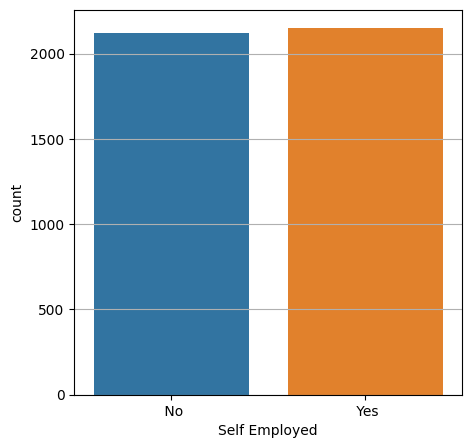

In [183]:
plt.figure(figsize=(5,5))
sns.countplot(x=data["self_employed"],data=data,hue="self_employed")
plt.xlabel("Self Employed")
plt.grid("---",axis="y")
# plt.legend(title="self_employed",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

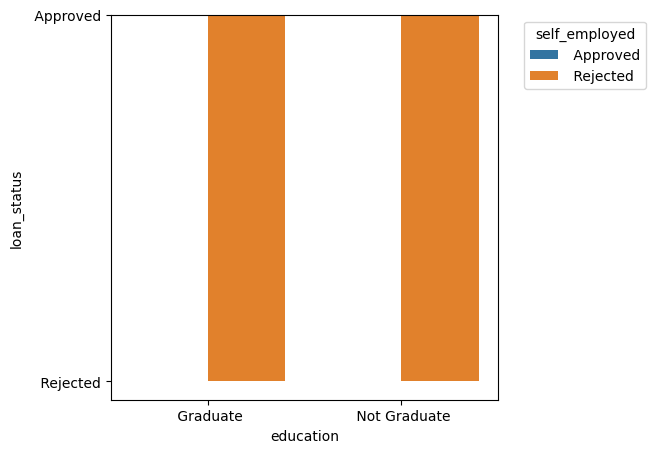

In [184]:
plt.figure(figsize=(5,5))
sns.barplot(data=data, x="education", y="loan_status",hue="loan_status")
plt.legend(title="self_employed",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [185]:
cat_col=["education","loan_status","self_employed"]
label_encoders={}
# for col in cat_col:
#     le=LabelEncoder()
#     data[col]=le.fit_transform(data[col])
#     label_encoders[col]=le


In [186]:
for col in cat_col:
    data[col] = data[col].str.strip()  # 🧼 remove leading/trailing whitespace
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"{col} classes: {le.classes_}") 



education classes: ['Graduate' 'Not Graduate']
loan_status classes: ['Approved' 'Rejected']
self_employed classes: ['No' 'Yes']


In [187]:
x=data.drop(columns=["loan_status"])
y=data["loan_status"]

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [189]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [190]:
# lr=LogisticRegression()
# lr.fit(x_train,y_train)
# lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

In [191]:
# r=RandomForestClassifier(n_estimators=100,criterion="gini")
# r.fit(x_train,y_train)
# r.score(x_test,y_test)*100,r.score(x_train,y_train)*100

In [192]:
dt=DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(96.13583138173301, 96.398243045388)

In [193]:
y_true=y_test
y_pred=dt.predict(x_test)
print("classification report:-",classification_report(y_true,y_pred))

classification report:-               precision    recall  f1-score   support

           0       0.99      0.95      0.97       536
           1       0.92      0.98      0.95       318

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



In [194]:
import joblib

joblib.dump(dt,"Loan_Approval.pkl",compress=9)

for col, le in label_encoders.items():
    joblib.dump(le, f'{col}_encoder.pkl')



In [204]:
x.columns


Index(['education', 'self_employed', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value'],
      dtype='object')

In [195]:
param={"max_depth":[3,5,6,7],
      "criterion":["entropy","gini"]}
grid=GridSearchCV(dt,param)
grid.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 6, 7]})

In [196]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [197]:
data.head()

,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,0,0,9600000,29900000,12,778,2400000,17600000,0
1,1,1,4100000,12200000,8,417,2700000,2200000,1
2,0,0,9100000,29700000,20,506,7100000,4500000,1
3,0,0,8200000,30700000,8,467,18200000,3300000,1
4,1,1,9800000,24200000,20,382,12400000,8200000,1


In [198]:
dt.predict([[0,	0,	9600000,	29900000,	12,	778,	2400000,	17600000	]])

if dt.predict(x_test)[0] == 0:
    print("Loan Rejected")
else:
    print("Loan Approved")


Loan Approved


In [199]:
y_prd=dt.predict(x_test)

In [200]:
accuracy_score(y_test,y_prd)

0.9613583138173302

In [201]:
cm=confusion_matrix(y_test,y_prd)


<Axes: >

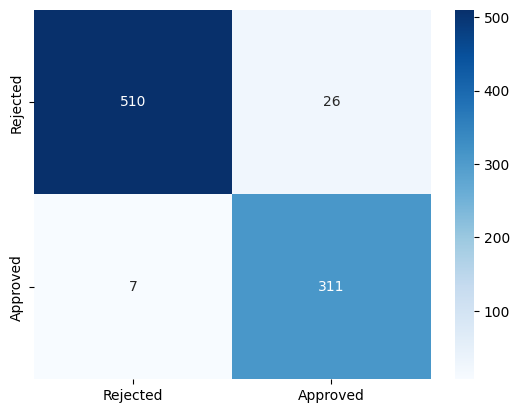

In [202]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Rejected","Approved"], yticklabels=["Rejected","Approved"])

[0.         0.         0.         0.01157913 0.13771408 0.83644873
 0.01154485 0.00271321]


C:\Users\Acer\AppData\Local\Temp\ipykernel_12576\4233679409.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


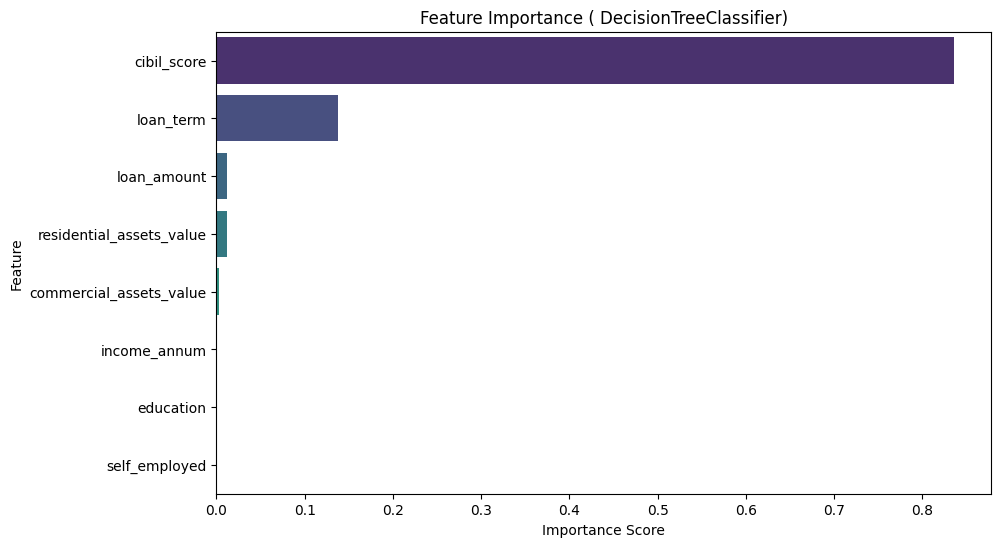

In [203]:
importances = dt.feature_importances_
feature_names = x.columns
print(importances)

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance ( DecisionTreeClassifier)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()